In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline
sns.set()

# Import and preprocess

In [2]:
raw_data = pd.read_csv('D:\\Users\\Minerva\\Programming\\Udemy\\The Data Science Course 2019 Complete Data Science Bootcamp\\35. Advanced Statistical Methods - Practical Example Linear Regression\\cars.csv')
raw_data.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26
0,2,83.0,subaru,gas,std,two,hatchback,fwd,front,93.7,...,97,2bbl,3.62,2.36,9.0,69.0,4900.0,31,36,5118.0
1,2,121.0,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.5,48.0,5100.0,47,53,5151.0
2,1,104.0,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68.0,5000.0,30,31,5195.0
3,1,87.0,toyota,gas,std,two,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62.0,4800.0,35,39,5348.0
4,2,161.0,mitsubishi,gas,std,two,hatchback,fwd,front,93.7,...,92,2bbl,2.97,3.23,9.4,68.0,5500.0,37,41,5389.0


In [3]:
raw_data.columns = ['symboling','normd_losses','make','fuel_type','aspiration','num_doors','body','drive',\
                'engine_loc','wheel_base','length','width','height','weight','engine_type','cylinders',\
                'engine_size','fuel_system','bore','stroke','compression','horsepower','peak_rpm',\
                'city_mpg','hwy_mpg','price']

In [4]:
raw_data.describe()

,symboling,normd_losses,wheel_base,length,width,height,weight,engine_size,compression,horsepower,peak_rpm,city_mpg,hwy_mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
raw_data[['symboling','normd_losses','make','fuel_type','aspiration','num_doors','body',\
          'drive','engine_loc','wheel_base','length','width','height']].describe(include='all')
#raw_data.info #205 rows imported

,symboling,normd_losses,make,fuel_type,aspiration,num_doors,body,drive,engine_loc,wheel_base,length,width,height
count,205.000000,164.000000,205,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,22,2,2,3,5,3,2,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,185,168,114,96,120,202,NaN,NaN,NaN,NaN
mean,0.834146,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878
std,1.245307,35.442168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000
25%,0.000000,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000
50%,1.000000,115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000
75%,2.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000


In [6]:
raw_data[['weight','engine_type','cylinders','engine_size','fuel_system','bore','stroke',\
          'compression','horsepower','peak_rpm','city_mpg','hwy_mpg','price']].describe(include='all')

,weight,engine_type,cylinders,engine_size,fuel_system,bore,stroke,compression,horsepower,peak_rpm,city_mpg,hwy_mpg,price
count,205.000000,205,205,205.000000,205,203,203,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
unique,NaN,7,7,NaN,8,39,37,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,ohc,four,NaN,mpfi,3.62,3.4,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,148,159,NaN,94,23,20,NaN,NaN,NaN,NaN,NaN,NaN
mean,2555.565854,NaN,NaN,126.907317,NaN,NaN,NaN,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,520.680204,NaN,NaN,41.642693,NaN,NaN,NaN,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,1488.000000,NaN,NaN,61.000000,NaN,NaN,NaN,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,2145.000000,NaN,NaN,97.000000,NaN,NaN,NaN,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,2414.000000,NaN,NaN,120.000000,NaN,NaN,NaN,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2935.000000,NaN,NaN,141.000000,NaN,NaN,NaN,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


# Missing values

In [8]:
raw_data.isnull().sum()

symboling        0
normd_losses    41
make             0
fuel_type        0
aspiration       0
num_doors        0
body             0
drive            0
engine_loc       0
wheel_base       0
length           0
width            0
height           0
weight           0
engine_type      0
cylinders        0
engine_size      0
fuel_system      0
bore             2
stroke           2
compression      0
horsepower       2
peak_rpm         2
city_mpg         0
hwy_mpg          0
price            4
dtype: int64

In [9]:
# remove normd losses column
# axis = 0 : rows
# axis = 1 : columns
data = raw_data.drop(['normd_losses'],axis=1)

In [10]:
# remove rows with small null amounts
data_full = data.dropna(axis=0)

# Exploring Probability Distribution Frequencies

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


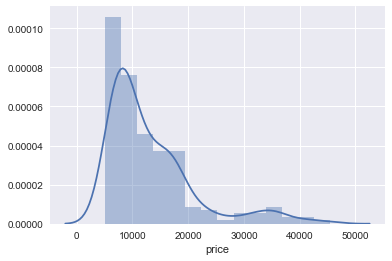

In [12]:
sns.distplot(data_full['price'])

# Outliers

In [ ]:
# If you had a few cars worth 120000 for example, you could remove them like this
#q = data_full['price'].quantile(0.99)
#data_1 = data_full[data_full['price'] < q]
#data_1.describe(include='all')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


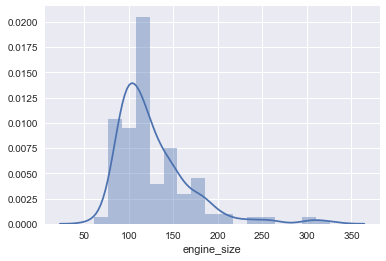

In [13]:
sns.distplot(data_full['engine_size'])

In [14]:
data_2 = data_full[data_full['engine_size'] < 320]

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


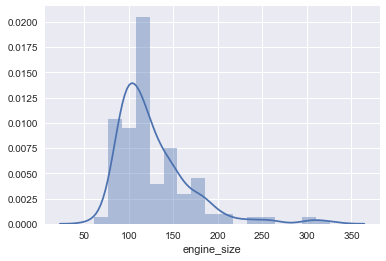

In [15]:
sns.distplot(data_full['engine_size'])

In [16]:
data_cleaned = data_2.reset_index(drop=True)

In [18]:
data_cleaned[['symboling','make','fuel_type','aspiration','num_doors','body',\
          'drive','engine_loc','wheel_base','length','width','height']].describe(include='all')

,symboling,make,fuel_type,aspiration,num_doors,body,drive,engine_loc,wheel_base,length,width,height
count,196.000000,196,196,196,196,196,196,196,196.000000,196.000000,196.000000,196.00000
unique,NaN,21,2,2,3,5,3,2,NaN,NaN,NaN,NaN
top,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN
freq,NaN,32,176,160,112,93,116,193,NaN,NaN,NaN,NaN
mean,0.821429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.843878,174.114286,65.860204,53.84898
std,1.246019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.122871,12.392177,2.099975,2.39014
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,48.80000
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.075000,52.00000
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.450000,54.10000
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.500000,66.600000,55.62500


In [19]:
data_cleaned[['weight','engine_type','cylinders','engine_size','fuel_system','bore','stroke',\
          'compression','horsepower','peak_rpm','city_mpg','hwy_mpg','price']].describe(include='all')

,weight,engine_type,cylinders,engine_size,fuel_system,bore,stroke,compression,horsepower,peak_rpm,city_mpg,hwy_mpg,price
count,196.000000,196,196,196.000000,196,196,196,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
unique,NaN,6,6,NaN,8,39,36,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,ohc,four,NaN,mpfi,3.62,3.4,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,143,155,NaN,89,23,19,NaN,NaN,NaN,NaN,NaN,NaN
mean,2550.714286,NaN,NaN,126.387755,NaN,NaN,NaN,10.180204,102.612245,5109.183673,25.346939,30.831633,13146.188776
std,513.903084,NaN,NaN,39.158359,NaN,NaN,NaN,4.051375,36.087538,475.736780,6.386849,6.785899,7869.995686
min,1488.000000,NaN,NaN,61.000000,NaN,NaN,NaN,7.000000,48.000000,4150.000000,14.000000,16.000000,5118.000000
25%,2145.000000,NaN,NaN,98.000000,NaN,NaN,NaN,8.500000,70.000000,4800.000000,19.000000,25.000000,7765.750000
50%,2414.000000,NaN,NaN,119.500000,NaN,NaN,NaN,9.000000,95.000000,5150.000000,25.000000,30.000000,10270.000000
75%,2928.250000,NaN,NaN,142.000000,NaN,NaN,NaN,9.400000,116.000000,5500.000000,30.000000,34.500000,16500.750000


# Checking OLS assumptions

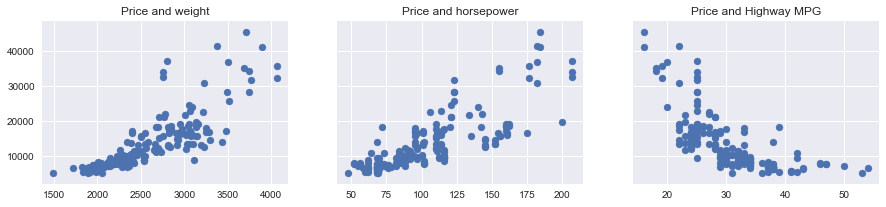

In [27]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['weight'],data_cleaned['price'])
ax1.set_title('Price and weight')
ax2.scatter(data_cleaned['horsepower'],data_cleaned['price'])
ax2.set_title('Price and horsepower')
ax3.scatter(data_cleaned['hwy_mpg'],data_cleaned['price'])
ax3.set_title('Price and Highway MPG')
plt.show()

# Relaxing assumptions

In [28]:
log_price = np.log(data_cleaned['price'])
data_cleaned['log_price'] = log_price

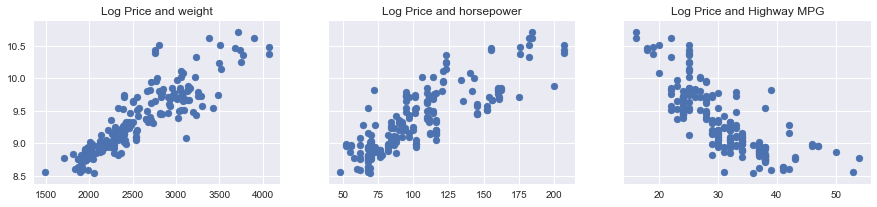

In [29]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['weight'],data_cleaned['log_price'])
ax1.set_title('Log Price and weight')
ax2.scatter(data_cleaned['horsepower'],data_cleaned['log_price'])
ax2.set_title('Log Price and horsepower')
ax3.scatter(data_cleaned['hwy_mpg'],data_cleaned['log_price'])
ax3.set_title('Log Price and Highway MPG')
plt.show()

# Multicollinearity

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['weight','horsepower','hwy_mpg']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [31]:
# Variance Inflation Factor
# vif == 1 : no multicollinearity
# 1 < vif < 5 : ok
# 5 < vif : bad? some say 10

In [32]:
vif

,VIF,features
0,40.528070,weight
1,23.430698,horsepower
2,8.217261,hwy_mpg


In [33]:
data_nomcolin = data_cleaned.drop(['weight'], axis=1)

# Create Dummy Variables

In [34]:
data_withdummies = pd.get_dummies(data_nomcolin, drop_first=True)

In [35]:
data_withdummies.head()

,symboling,wheel_base,length,width,height,engine_size,compression,horsepower,peak_rpm,city_mpg,...,stroke_3.47,stroke_3.5,stroke_3.52,stroke_3.54,stroke_3.58,stroke_3.64,stroke_3.86,stroke_3.9,stroke_4.17,stroke_?
0,2,93.7,156.9,63.4,53.7,97,9.0,69.0,4900.0,31,...,0,0,0,0,0,0,0,0,0,0
1,2,88.4,141.1,60.3,53.2,61,9.5,48.0,5100.0,47,...,0,0,0,0,0,0,0,0,0,0
2,1,93.1,159.1,64.2,54.1,91,9.0,68.0,5000.0,30,...,0,0,0,0,0,0,0,0,0,0
3,1,95.7,158.7,63.6,54.5,92,9.0,62.0,4800.0,35,...,0,0,0,0,0,0,0,0,0,0
4,2,93.7,157.3,64.4,50.8,92,9.4,68.0,5500.0,37,...,0,0,0,0,0,0,0,0,0,0


# Rearranging columns

In [36]:
data_withdummies.columns.values

array(['symboling', 'wheel_base', 'length', 'width', 'height',
       'engine_size', 'compression', 'horsepower', 'peak_rpm', 'city_mpg',
       'hwy_mpg', 'price', 'log_price', 'make_audi', 'make_bmw',
       'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_saab', 'make_subaru', 'make_toyota',
       'make_volkswagen', 'make_volvo', 'fuel_type_gas',
       'aspiration_turbo', 'num_doors_four', 'num_doors_two',
       'body_hardtop', 'body_hatchback', 'body_sedan', 'body_wagon',
       'drive_fwd', 'drive_rwd', 'engine_loc_rear', 'engine_type_l',
       'engine_type_ohc', 'engine_type_ohcf', 'engine_type_ohcv',
       'engine_type_rotor', 'cylinders_five', 'cylinders_four',
       'cylinders_six', 'cylinders_three', 'cylinders_two',
       'fuel_system_2bbl', 'fuel_system_4bbl', 'fuel_system_idi',
    

In [39]:
cols = ['log_price','symboling', 'wheel_base', 'length', 'width', 'height',
       'engine_size', 'compression', 'horsepower', 'peak_rpm', 'city_mpg',
       'hwy_mpg', 'price', 'make_audi', 'make_bmw',
       'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_saab', 'make_subaru', 'make_toyota',
       'make_volkswagen', 'make_volvo', 'fuel_type_gas',
       'aspiration_turbo', 'num_doors_four', 'num_doors_two',
       'body_hardtop', 'body_hatchback', 'body_sedan', 'body_wagon',
       'drive_fwd', 'drive_rwd', 'engine_loc_rear', 'engine_type_l',
       'engine_type_ohc', 'engine_type_ohcf', 'engine_type_ohcv',
       'engine_type_rotor', 'cylinders_five', 'cylinders_four',
       'cylinders_six', 'cylinders_three', 'cylinders_two',
       'fuel_system_2bbl', 'fuel_system_4bbl', 'fuel_system_idi',
       'fuel_system_mfi', 'fuel_system_mpfi', 'fuel_system_spdi',
       'fuel_system_spfi', 'bore_2.68', 'bore_2.91', 'bore_2.92',
       'bore_2.97', 'bore_2.99', 'bore_3.01', 'bore_3.03', 'bore_3.05',
       'bore_3.08', 'bore_3.13', 'bore_3.15', 'bore_3.17', 'bore_3.19',
       'bore_3.24', 'bore_3.27', 'bore_3.31', 'bore_3.33', 'bore_3.34',
       'bore_3.35', 'bore_3.39', 'bore_3.43', 'bore_3.46', 'bore_3.47',
       'bore_3.5', 'bore_3.54', 'bore_3.58', 'bore_3.59', 'bore_3.6',
       'bore_3.61', 'bore_3.62', 'bore_3.63', 'bore_3.7', 'bore_3.74',
       'bore_3.76', 'bore_3.78', 'bore_3.8', 'bore_3.94', 'bore_?',
       'stroke_2.19', 'stroke_2.36', 'stroke_2.64', 'stroke_2.68',
       'stroke_2.8', 'stroke_2.87', 'stroke_2.9', 'stroke_3.03',
       'stroke_3.07', 'stroke_3.08', 'stroke_3.1', 'stroke_3.11',
       'stroke_3.12', 'stroke_3.15', 'stroke_3.16', 'stroke_3.19',
       'stroke_3.21', 'stroke_3.23', 'stroke_3.27', 'stroke_3.29',
       'stroke_3.35', 'stroke_3.39', 'stroke_3.4', 'stroke_3.41',
       'stroke_3.46', 'stroke_3.47', 'stroke_3.5', 'stroke_3.52',
       'stroke_3.54', 'stroke_3.58', 'stroke_3.64', 'stroke_3.86',
       'stroke_3.9', 'stroke_4.17', 'stroke_?']

In [40]:
data_preprocessed = data_withdummies[cols]
data_preprocessed.head()

,log_price,symboling,wheel_base,length,width,height,engine_size,compression,horsepower,peak_rpm,...,stroke_3.47,stroke_3.5,stroke_3.52,stroke_3.54,stroke_3.58,stroke_3.64,stroke_3.86,stroke_3.9,stroke_4.17,stroke_?
0,8.540519,2,93.7,156.9,63.4,53.7,97,9.0,69.0,4900.0,...,0,0,0,0,0,0,0,0,0,0
1,8.546946,2,88.4,141.1,60.3,53.2,61,9.5,48.0,5100.0,...,0,0,0,0,0,0,0,0,0,0
2,8.555452,1,93.1,159.1,64.2,54.1,91,9.0,68.0,5000.0,...,0,0,0,0,0,0,0,0,0,0
3,8.584478,1,95.7,158.7,63.6,54.5,92,9.0,62.0,4800.0,...,0,0,0,0,0,0,0,0,0,0
4,8.592115,2,93.7,157.3,64.4,50.8,92,9.4,68.0,5500.0,...,0,0,0,0,0,0,0,0,0,0


# Lin Reg Model

In [41]:
# Declare inputs and targets
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

In [43]:
# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [44]:
inputs_scaled = scaler.transform(inputs)

In [45]:
# split train & testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [46]:
# Create Regression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
yhat = reg.predict(x_train)

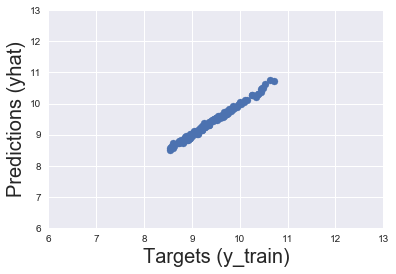

In [56]:
plt.scatter(y_train, yhat)
plt.xlabel('Targets (y_train)',size=20)
plt.ylabel('Predictions (yhat)', size=20)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


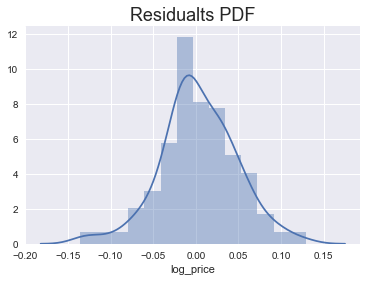

In [58]:
# Residual plot is difference b/t targets & predictions
sns.distplot(y_train - yhat)
plt.title('Residualts PDF', size=18)
plt.show()

In [59]:
reg.score(x_train,y_train)

0.9921708471504368

# Weights & Bias

In [60]:
reg.intercept_

-282063158175.693

In [61]:
reg.coef_

array([-6.60821574e-03, -2.89929192e-03,  3.85280586e-02, -5.87829464e-02,
        1.19877309e-02,  5.62488623e-01,  3.59685579e-01,  4.28217930e-02,
       -7.45594574e-02, -1.34904290e-01,  7.10285351e-02,  4.63554025e-01,
        1.09955939e+12,  1.21179535e+11, -5.65829369e+11,  1.56816458e+12,
        4.46595476e+11, -3.86363168e+11, -1.03638923e+12,  3.07290575e+12,
        2.29522236e+11,  9.82034280e+11,  1.86443310e+12,  2.03243546e+12,
       -1.06926624e+12,  1.39036717e+12, -3.54453051e+12,  2.93909090e+12,
       -5.73805840e+12,  2.13679700e+12,  1.53026203e+12,  1.27303487e+12,
        1.20821188e+12,  2.30837449e-02,  4.21546208e+11,  4.20199842e+11,
       -1.17612040e-02, -3.81952034e-02, -6.07292590e-02, -4.29183244e-02,
       -3.42767643e-02,  2.56003016e-03,  1.01596205e+12,  2.74710190e+12,
        1.82636404e-02,  9.52496763e+12,  6.79552709e+11,  1.31470742e+12,
       -9.80590596e+11, -1.81254597e+12, -1.18160200e+12, -1.70709401e+11,
       -3.54272973e+12,  

In [62]:
reg_summary = pd.DataFrame(inputs.columns.values,columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,symboling,-6.608216e-03
1,wheel_base,-2.899292e-03
2,length,3.852806e-02
3,width,-5.878295e-02
4,height,1.198773e-02
5,engine_size,5.624886e-01
6,compression,3.596856e-01
7,horsepower,4.282179e-02
8,peak_rpm,-7.455946e-02
9,city_mpg,-1.349043e-01


# Weights Interpretations
## positive weight increases log_price
## negative weight lowers price
# Dummy Variables
## positive weight shows the respective category(make) is more expensive than benchmark(alfa-romero)

In [63]:
data_cleaned['make'].unique()

array(['subaru', 'chevrolet', 'mazda', 'toyota', 'mitsubishi', 'honda',
       'nissan', 'dodge', 'plymouth', 'isuzu', 'volkswagen', 'saab',
       'peugot', 'volvo', 'alfa-romero', 'audi', 'bmw', 'mercury',
       'porsche', 'mercedes-benz', 'jaguar'], dtype=object)

# Testing

In [64]:
yhat_test = reg.predict(x_test)

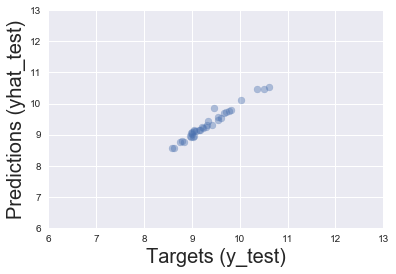

In [67]:
# alpha is opacity
plt.scatter(y_test, yhat_test, alpha=0.4)
plt.xlabel('Targets (y_test)',size=20)
plt.ylabel('Predictions (yhat_test)', size=20)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [68]:
df_performance = pd.DataFrame(yhat_test, columns=['Prediction'])
df_performance.head()

,Prediction
0,9.212769
1,9.045288
2,9.229858
3,9.161499
4,9.569702


In [69]:
# These were predictions for log prices so we have to take exponential of log
df_performance = pd.DataFrame(np.exp(yhat_test), columns=['Prediction'])
df_performance.head()

,Prediction
0,10024.311331
1,8478.493722
2,10197.097485
3,9523.322066
4,14324.149218


In [70]:
df_performance['Target'] = np.exp(y_test)
df_performance

,Prediction,Target
0,1.002431e+04,NaN
1,8.478494e+03,NaN
2,1.019710e+04,NaN
3,9.523322e+03,NaN
4,1.432415e+04,5389.0
5,1.712703e+04,NaN
6,0.000000e+00,NaN
7,8.955074e+03,NaN
8,6.615967e+03,5572.0
9,3.787988e+04,NaN


In [71]:
# Lots of missing values
y_test

98      9.239414
58      8.984067
93      9.209140
86      9.158521
130     9.536762
159     9.781885
162     9.806426
64      9.011279
20      8.802222
193    10.620351
191    10.515425
69      9.047233
143     9.680219
149     9.714625
105     9.323580
13      8.747511
135     9.618469
60      8.987072
88      9.164192
184    10.360912
66      9.017847
79      9.099297
165     9.820052
85      9.137555
103     9.296335
177    10.026811
62      8.994421
115     9.416541
134     9.607034
75      9.087608
26      8.823942
108     9.328923
68      9.041803
8       8.625509
120     9.468465
4       8.592115
72      9.054622
71      9.047704
129     9.535679
49      8.958669
Name: log_price, dtype: float64

In [72]:
# indices were preserved by pandas
y_test = y_test.reset_index(drop=True)
y_test.head()

0    9.239414
1    8.984067
2    9.209140
3    9.158521
4    9.536762
Name: log_price, dtype: float64

In [73]:
df_performance['Target'] = np.exp(y_test)
df_performance

,Prediction,Target
0,1.002431e+04,10295.0
1,8.478494e+03,7975.0
2,1.019710e+04,9988.0
3,9.523322e+03,9495.0
4,1.432415e+04,13860.0
5,1.712703e+04,17710.0
6,0.000000e+00,18150.0
7,8.955074e+03,8195.0
8,6.615967e+03,6649.0
9,3.787988e+04,40960.0


In [74]:
df_performance['Residual'] = df_performance['Target'] - df_performance['Prediction']

In [75]:
df_performance.head()

,Prediction,Target,Residual
0,10024.311331,10295.0,270.688669
1,8478.493722,7975.0,-503.493722
2,10197.097485,9988.0,-209.097485
3,9523.322066,9495.0,-28.322066
4,14324.149218,13860.0,-464.149218


In [77]:
df_performance['Difference%'] = np.absolute(df_performance['Residual'] / df_performance['Target'] * 100)
df_performance.head()

,Prediction,Target,Residual,Difference%
0,10024.311331,10295.0,270.688669,2.629322
1,8478.493722,7975.0,-503.493722,6.313401
2,10197.097485,9988.0,-209.097485,2.093487
3,9523.322066,9495.0,-28.322066,0.298284
4,14324.149218,13860.0,-464.149218,3.348840


In [78]:
df_performance.describe()

,Prediction,Target,Residual,Difference%
count,4.000000e+01,40.000000,4.000000e+01,40.000000
mean,inf,12861.400000,-inf,inf
std,NaN,7947.199806,NaN,NaN
min,0.000000e+00,5389.000000,-inf,0.039117
25%,7.560305e+03,8235.500000,-3.881469e+02,2.005025
50%,9.435786e+03,9768.500000,5.816373e+01,5.931455
75%,1.483278e+04,14911.750000,6.961753e+02,9.462159
max,inf,40960.000000,1.815000e+04,inf


In [79]:
pd.options.display.max_rows = 300
pd.set_option('display.float_format',lambda x: '%.2f' % x)
df_performance.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
13,16551.52,16558.00,6.48,0.04
23,9323.18,9298.00,-25.18,0.27
3,9523.32,9495.00,-28.32,0.30
39,7749.97,7775.00,25.03,0.32
8,6615.97,6649.00,33.03,0.50
22,18130.65,18399.00,268.35,1.46
15,6387.42,6295.00,-92.42,1.47
35,5305.71,5389.00,83.29,1.55
26,8193.60,8058.00,-135.60,1.68
14,11004.18,11199.00,194.82,1.74


# Improving model:
# 1. use different set of variables
# 2. remove bigger part of the outliers
# 3. use different transformations